<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [0]:
from zipfile import ZipFile 
path = F"/content/gdrive/My Drive/brainTumorDataPublic_1766.zip" 
with ZipFile(path, 'r') as zipObj:
  zipObj.extractall()

In [0]:
path = F"/content/gdrive/My Drive/brainTumorDataPublic_7671532.zip" 
with ZipFile(path, 'r') as zipObj:
  zipObj.extractall()

In [0]:
path = F"/content/gdrive/My Drive/brainTumorDataPublic_15332298.zip" 
with ZipFile(path, 'r') as zipObj:
  zipObj.extractall()

In [0]:
path = F"/content/gdrive/My Drive/brainTumorDataPublic_22993064.zip" 
with ZipFile(path, 'r') as zipObj:
  zipObj.extractall()

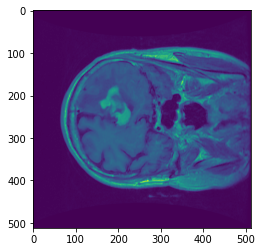

In [0]:
import h5py
from matplotlib import pyplot as plt
with h5py.File('750'+'.mat', 'r+') as f:
  
      images = f['cjdata']
      plt.imshow(images['image'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


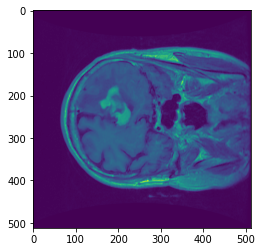

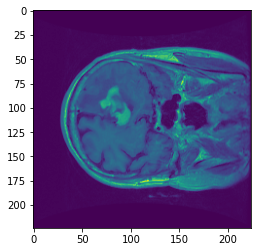

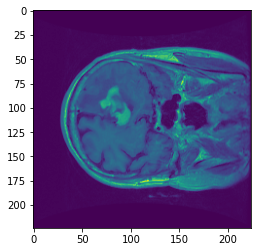

In [0]:
import h5py
import cv2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
with h5py.File('750'+'.mat', 'r+') as f:        
      images = f['cjdata']
      resized = cv2.resize(images['image'][:,:], (224,224), interpolation = cv2.INTER_CUBIC )
      x=np.asarray(resized)
      x=(x-np.min(x))/(np.max(x)-np.min(x))
      plt.imshow(images['image'])
      plt.show()
      plt.imshow(x)
      mn=np.mean(x)
      std=np.std(x)
      x=(x-mn)/std
      plt.show()
      plt.imshow(x)
      plt.show()

In [0]:
import zipfile
import h5py
import cv2
import glob, os
from matplotlib import pyplot as plt
import h5py
import numpy as np
from tqdm import tqdm
lbl=[]
img=np.zeros((3064,224,224))
for i in range(1,3065):
            with h5py.File(str(i)+'.mat', 'r+') as f:
              images = f['cjdata']
              resized = cv2.resize(images['image'][:,:], (224,224), interpolation = cv2.INTER_CUBIC )
              x=np.asarray(resized)
              x=(x-np.min(x))/(np.max(x)-np.min(x))
              x=x.reshape((1,224,224))
              img[i-1]=x
              lbl.append(int(images['label'][0]))

In [0]:
import scipy.io
obj_arr = {}
obj_arr['image'] = img
obj_arr['label'] = lbl
with h5py.File('cvind (2).mat', 'r+') as f:
      data=f['cvind']
      obj_arr['fold']=data[0]
np.save('/content/gdrive/My Drive/check.npy', obj_arr)